In [1]:
import re
import os
import time
import random
import numpy as np
from pandas import Series
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.api as sm
from fbprophet import Prophet
import itertools
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
from utils import *

In [3]:
pd.plotting.register_matplotlib_converters()

In [4]:
def plt_szn(df,szn='A',size='l',title=0):
    """
    simple plot with time scaled precision
    """
    
    if (size=='l'):
        df.resample(szn).mean().plot(figsize=(15,10),linewidth=3.0)
        if title !=0:
            plt.xlabel(title,fontsize=20)
    elif (size=='m'):
        df.resample(szn).mean().plot(figsize=(10,7),linewidth=2.0)
        if title !=0:
            plt.xlabel(title,fontsize=15)
    elif (size=='s'):
        df.resample(szn).mean().plot(figsize=(7,5),linewidth=1.0)
        if title !=0:
            plt.xlabel(title,fontsize=10)
    else:
        print('wrong size')
    if title !=0:
        plt.xlabel(title,fontsize=15)
    plt.axhline(0, color='black')

In [5]:
features=pd.read_csv('features',index_col=0)
features.index=pd.DatetimeIndex(features.index)

In [6]:
explore=pd.read_csv('daily09-19',index_col='date')
explore.index=pd.DatetimeIndex(explore.index)

In [7]:
explore

,space exploration_unscaled,space exploration_monthly,isPartial,scale,space exploration
date,,,,,
2009-01-01,0,56.0,False,0.56,0.00
2009-01-02,73,56.0,NaN,0.56,40.88
2009-01-03,46,56.0,NaN,0.56,25.76
2009-01-04,0,56.0,NaN,0.56,0.00
2009-01-05,95,56.0,NaN,0.56,53.20
...,...,...,...,...,...
2019-01-27,29,56.0,NaN,0.56,16.24
2019-01-28,54,56.0,NaN,0.56,30.24
2019-01-29,87,56.0,NaN,0.56,48.72


In [8]:
features.head()

,Aero_Stocks,SciFi_Movies,Nasa_Budget
2005-04-10,NaN,1.0,0.63
2005-04-11,NaN,1.0,0.63
2005-04-12,-0.008813,1.0,0.63
2005-04-13,-0.000719,1.0,0.63
2005-04-14,-0.006624,1.0,0.63


In [7]:
data=pd.merge(explore['space exploration'],features,how='left', left_on=explore.index,right_on=features.index)

In [8]:
data.index=pd.DatetimeIndex(explore.index)
data.drop(labels='key_0',axis=1,inplace=True)

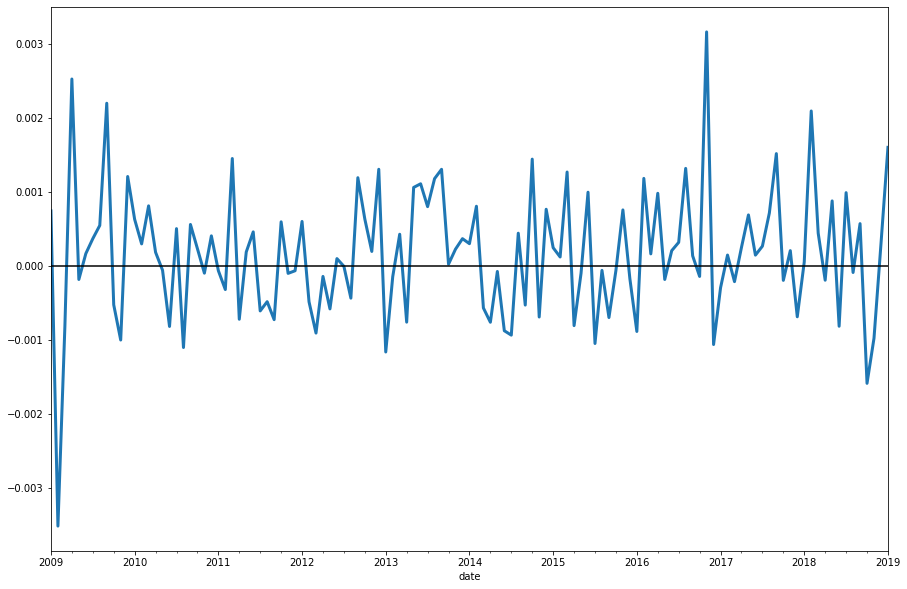

In [98]:
plt_szn(data['Aero_Stocks'],szn='M')

In [50]:
def make_cols(df,year=2018,cols=0):
    if cols==0:
        df1=df.loc[:'{}-01-01'.format(str(year))].reset_index()
        data_train=pd.DataFrame(df1[df1.columns[0]])
#         print(df1[df1.columns[0]])
        data_train.rename({data_train.columns[0]:'ds'},axis=1,inplace=True)
        data_train['y']=df1[df1.columns[3]]
        df1=df.loc['{}-01-01'.format(str(year)):].reset_index()
        data_test=pd.DataFrame(df1[df1.columns[0]])
        data_test.rename({data_test.columns[0]:'ds'},axis=1,inplace=True)
        data_test['y']=df1[df1.columns[3]]
        return [data_train,data_test]

In [51]:
dftrain,dftest=make_cols(data,year=2019)

In [52]:
dftrain.shape

(3653, 2)

In [53]:
m = Prophet(daily_seasonality=False,
           weekly_seasonality=True,
           yearly_seasonality=True,
           growth='linear')
m.fit(dftrain)

Text(64.25, 0.5, 'yay')

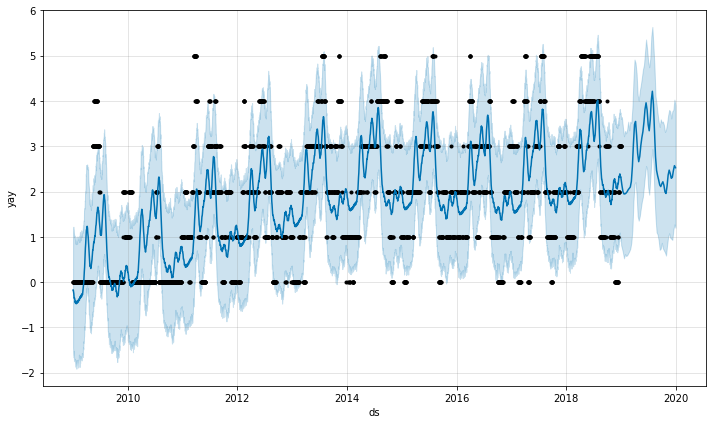

In [60]:
future = m.make_future_dataframe(periods=52,freq='W')
future['floor']=0
# future['cap']=100
# future.tail()
forecast = m.predict(future)



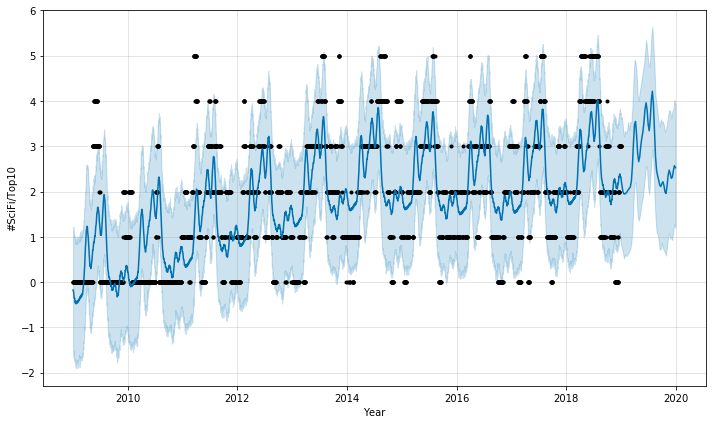

In [66]:
fig1 = m.plot(forecast,
              ylabel='#SciFi/Top10',
             xlabel='Year')


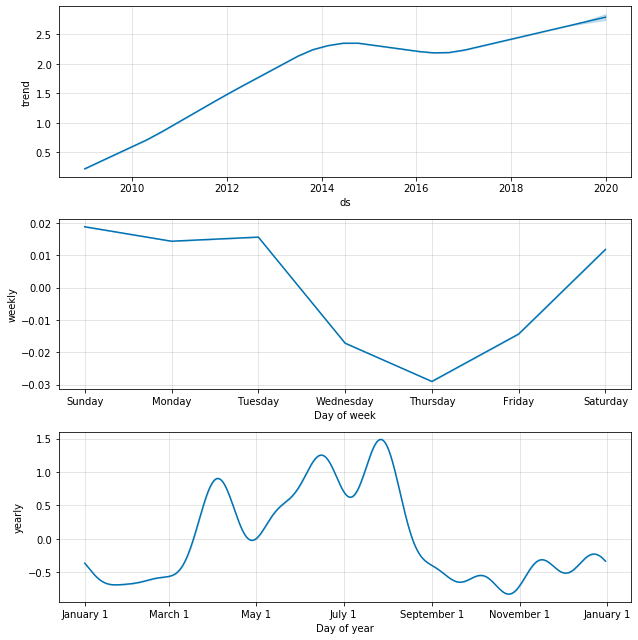

In [59]:
f = m.plot_components(forecast)